In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [122]:
df = pd.read_csv("data.csv")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [124]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [125]:
#sns.pairplot(df,corner=True,hue = "diagnosis")

In [126]:
df = df.drop(['Unnamed: 32', 'id'],axis=1)

In [127]:
df_catagorical = df['diagnosis']

In [128]:
dummm = pd.get_dummies(df_catagorical,drop_first=True)

In [129]:
df = pd.concat([df,dummm],axis = 1)

In [130]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  M  
0                  0.2654          0.4601                  0.11890  1  
1                  0.1860          0.2750                  0.08902  1  
2                  0.2430          0.3613                  0.08758  1  
3                  0.2575          0.6638                  0.17300  1  
4                  0.1625          0.2364                  0.07678  1  
..                    ...             ...                      ... ..  
564                0.2216          0.2060                  0.07115  1  
565                0.1628          0.257

In [131]:
diagnosis_col = df['M']

In [132]:
df = df.drop('diagnosis',axis=1)

In [133]:
df_pt1 = df[df.columns[0:10]]

df_pt2 = df[df.columns[10:20]]

df_pt3 = df[df.columns[20:]]

In [134]:
df_pt1 = pd.concat([df_pt1,diagnosis_col],axis=1)

In [135]:
df_pt2 = pd.concat([df_pt2,diagnosis_col],axis=1)

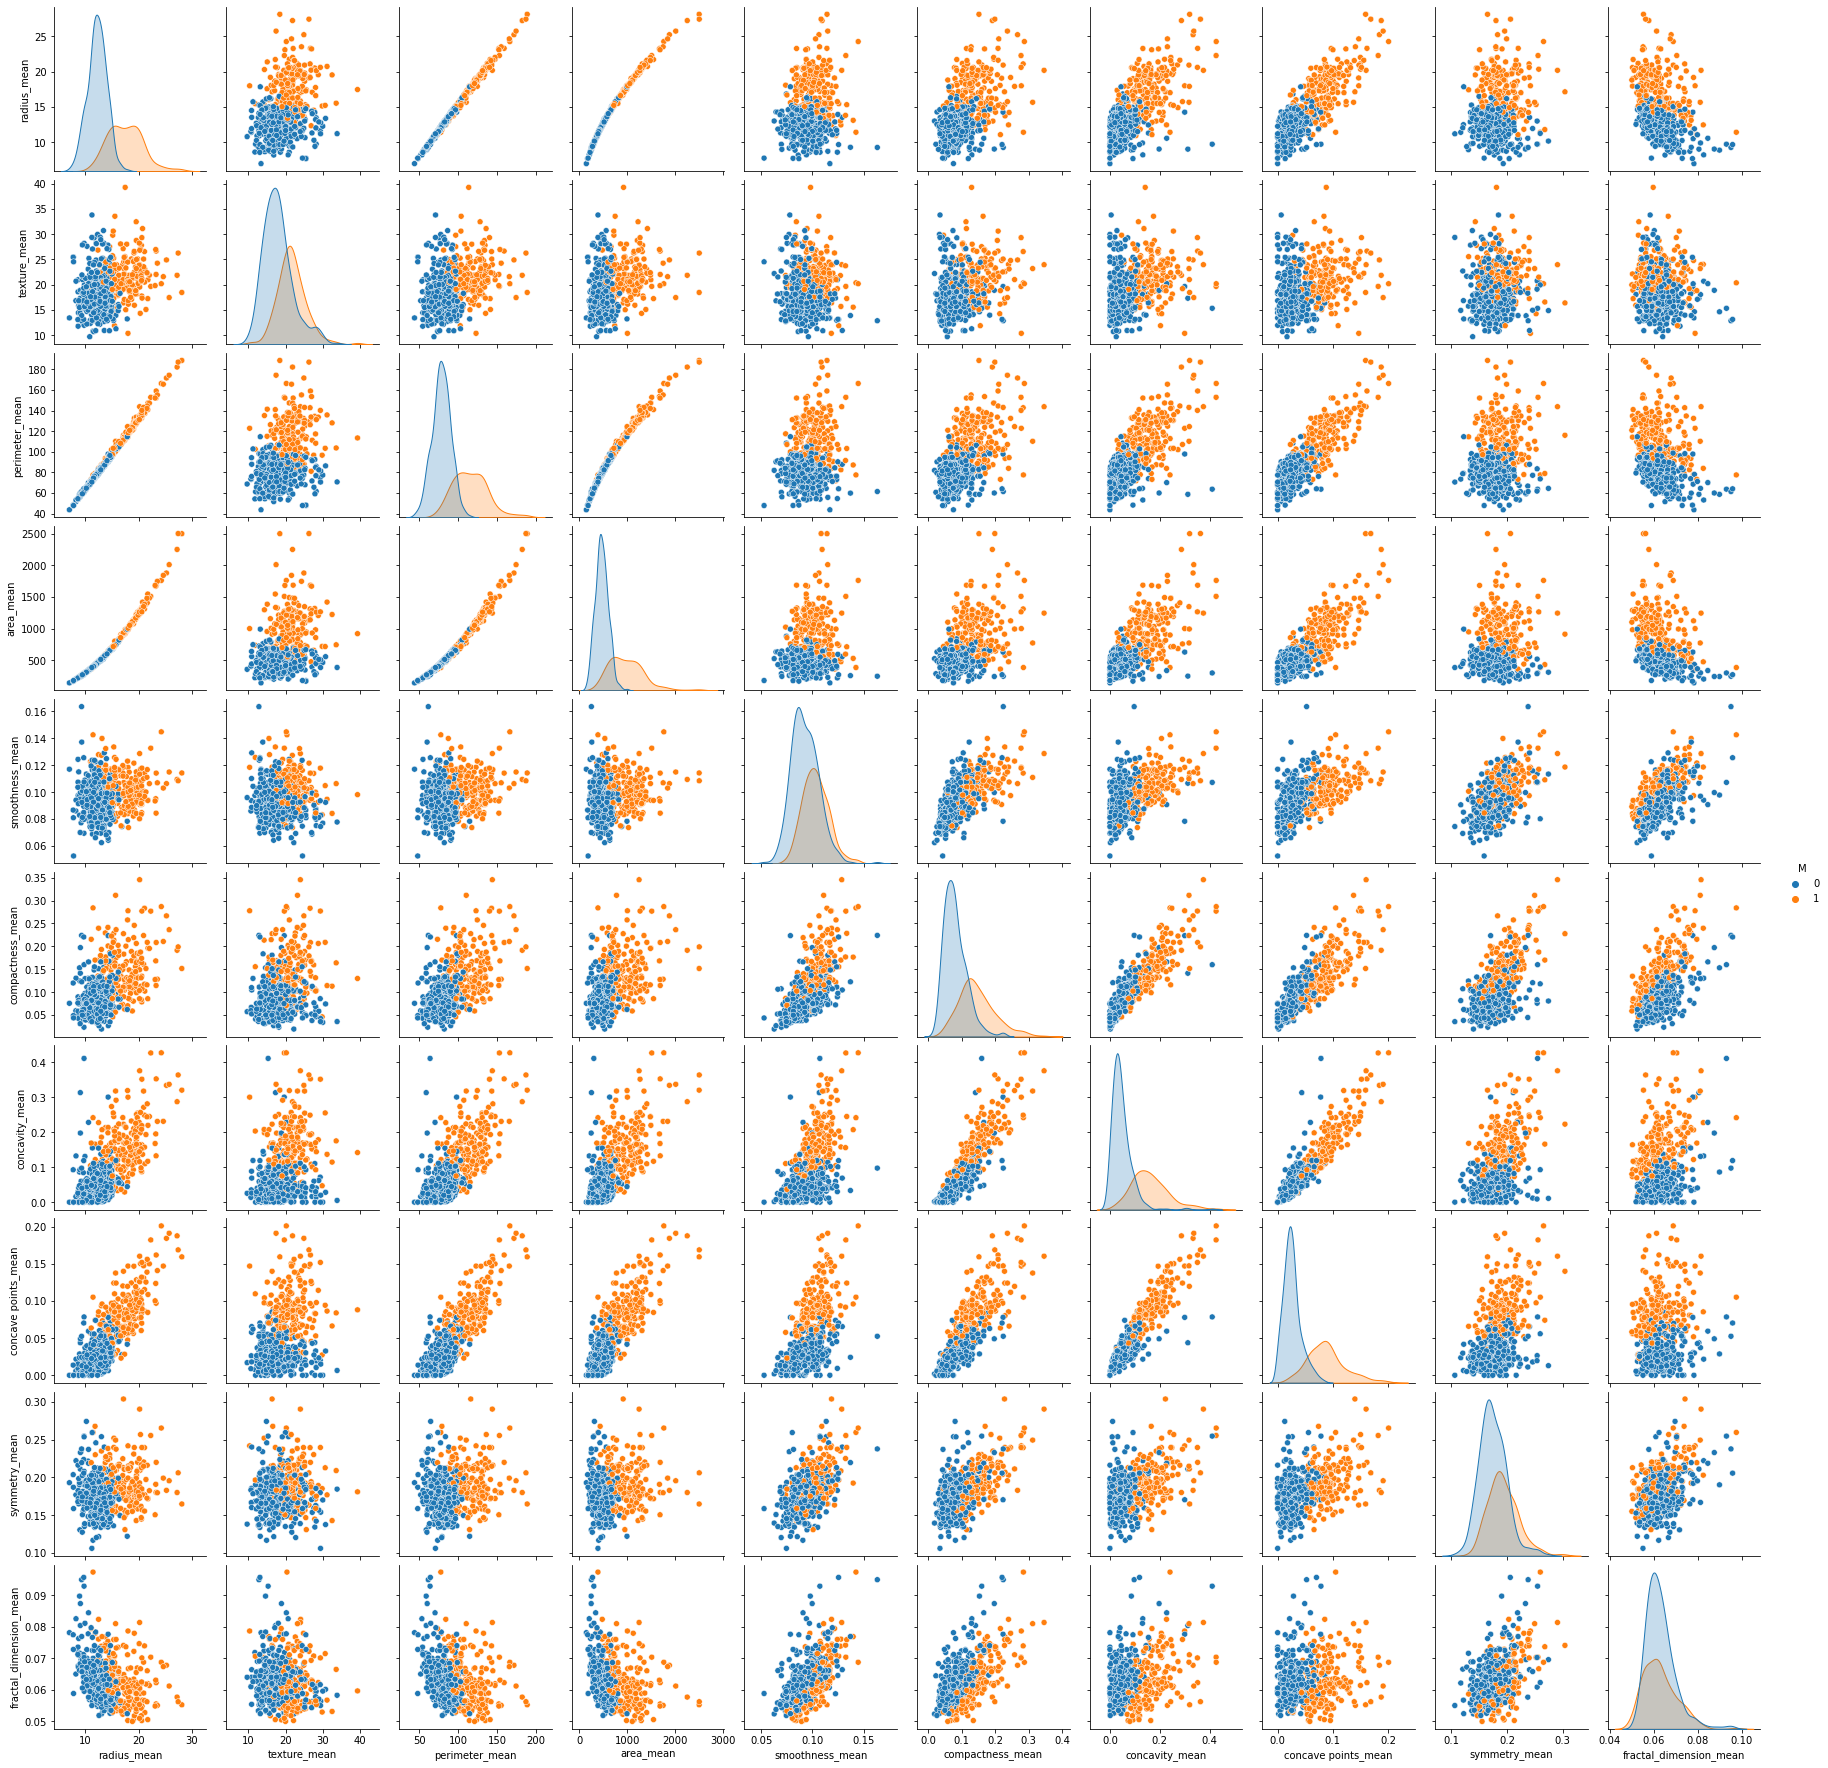

In [103]:
sns.pairplot(df_pt1, hue = 'M')

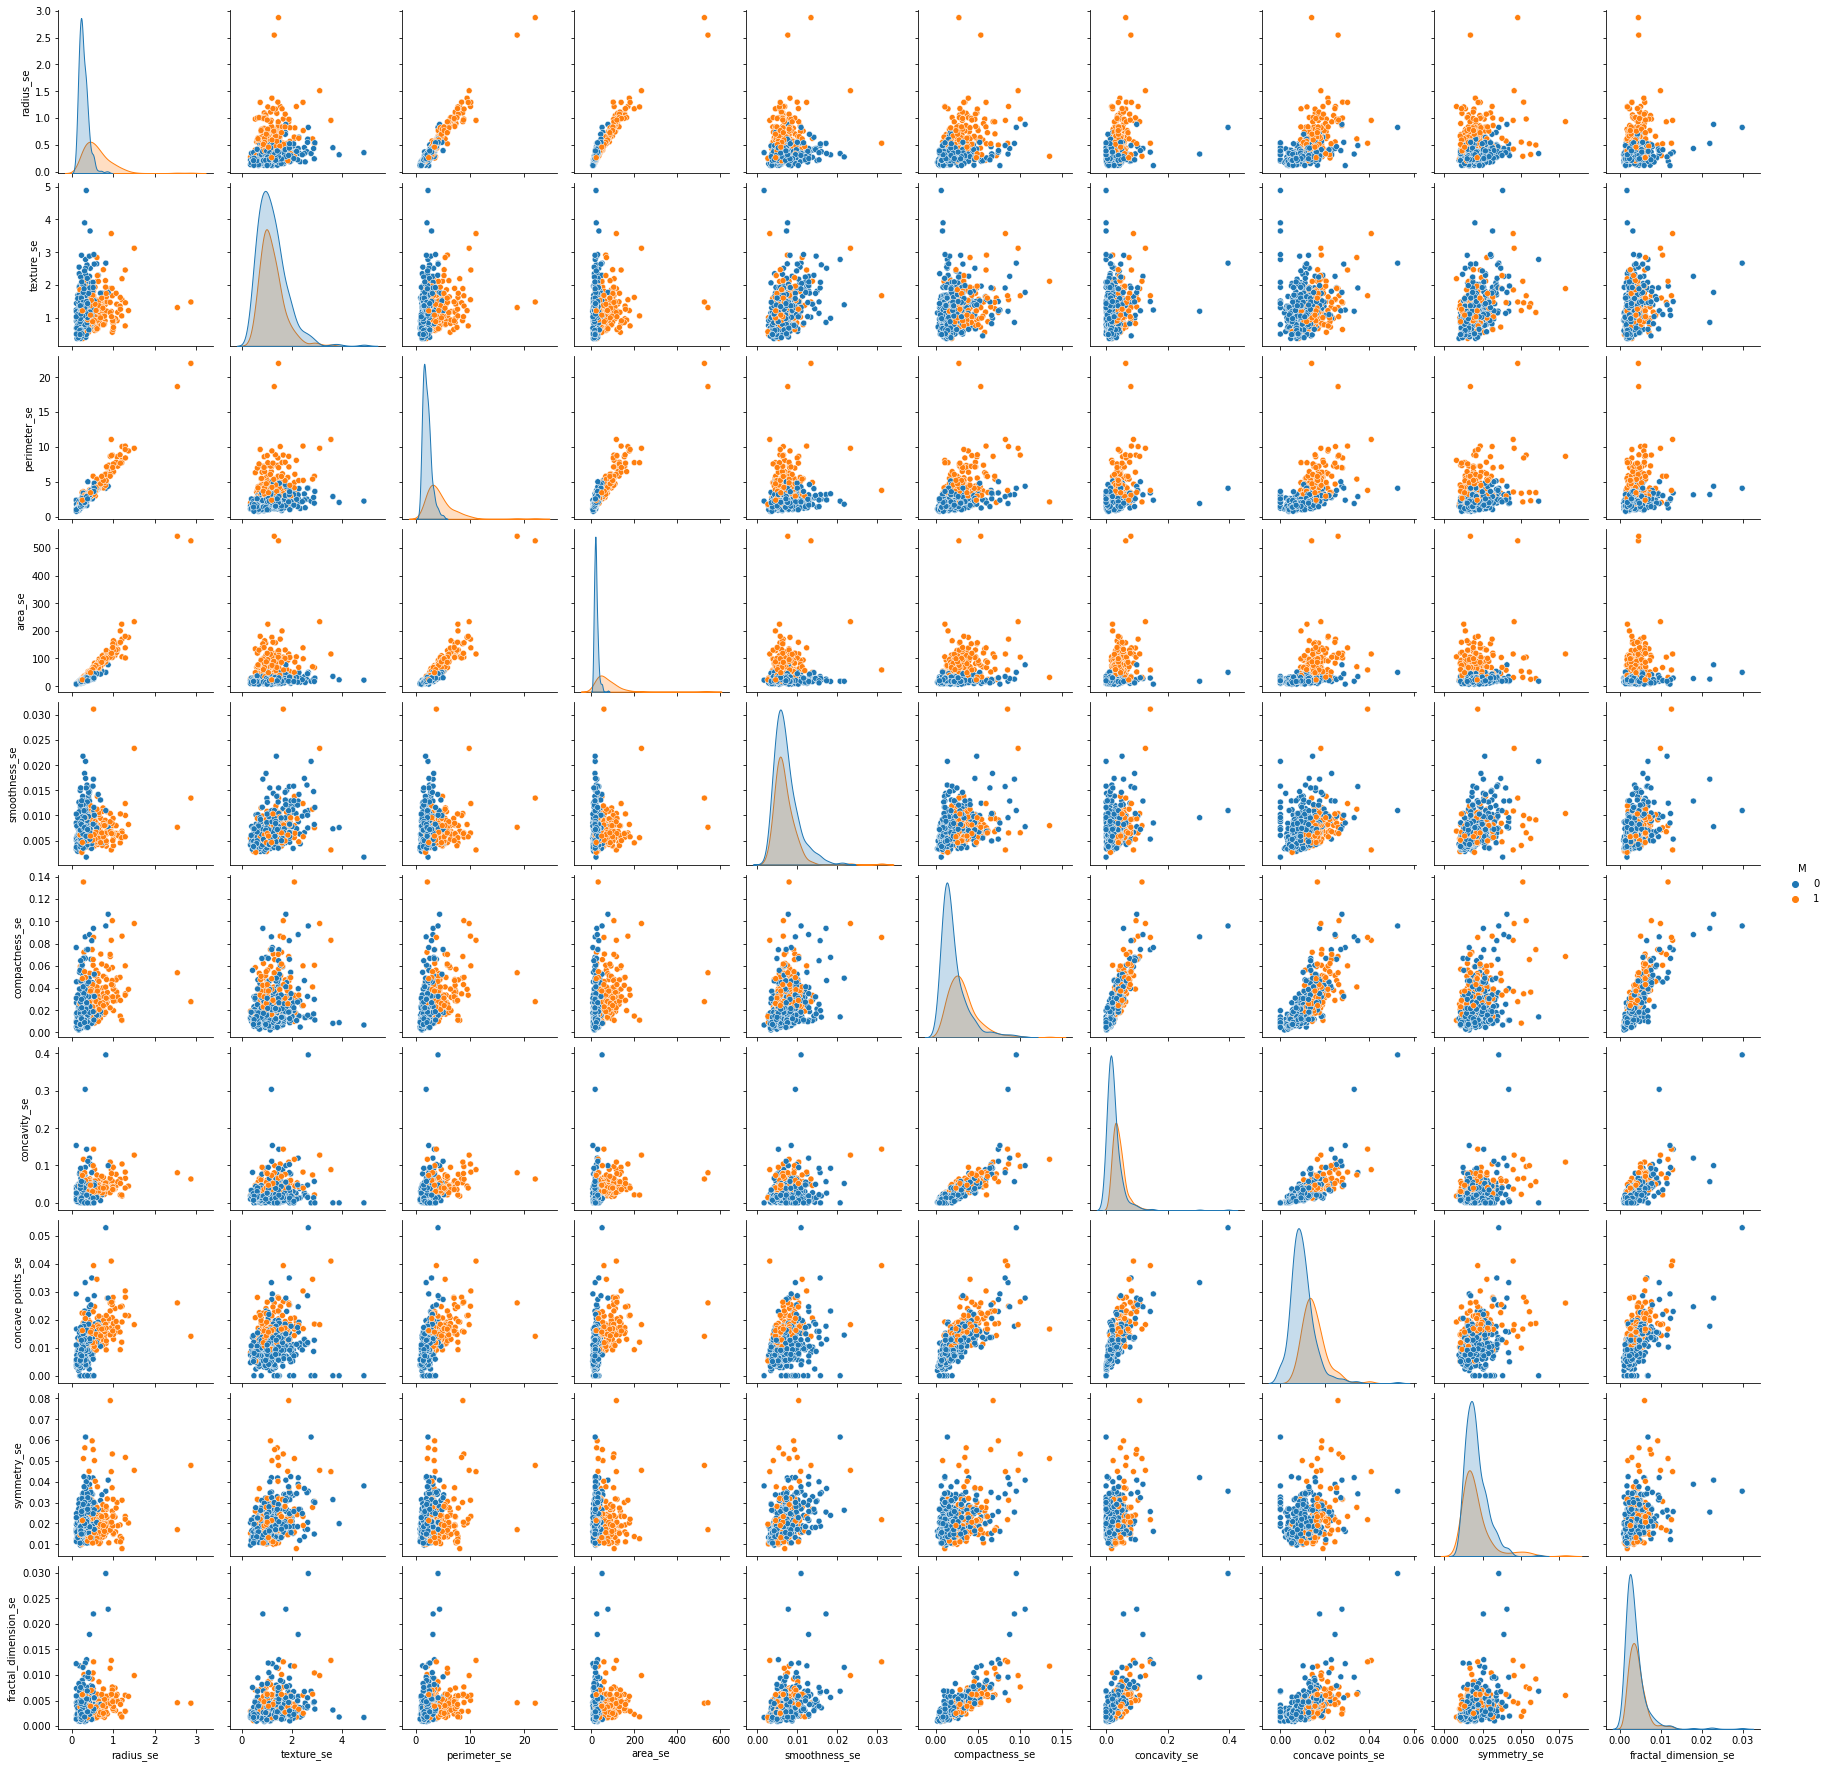

In [105]:
sns.pairplot(df_pt2, hue = 'M')

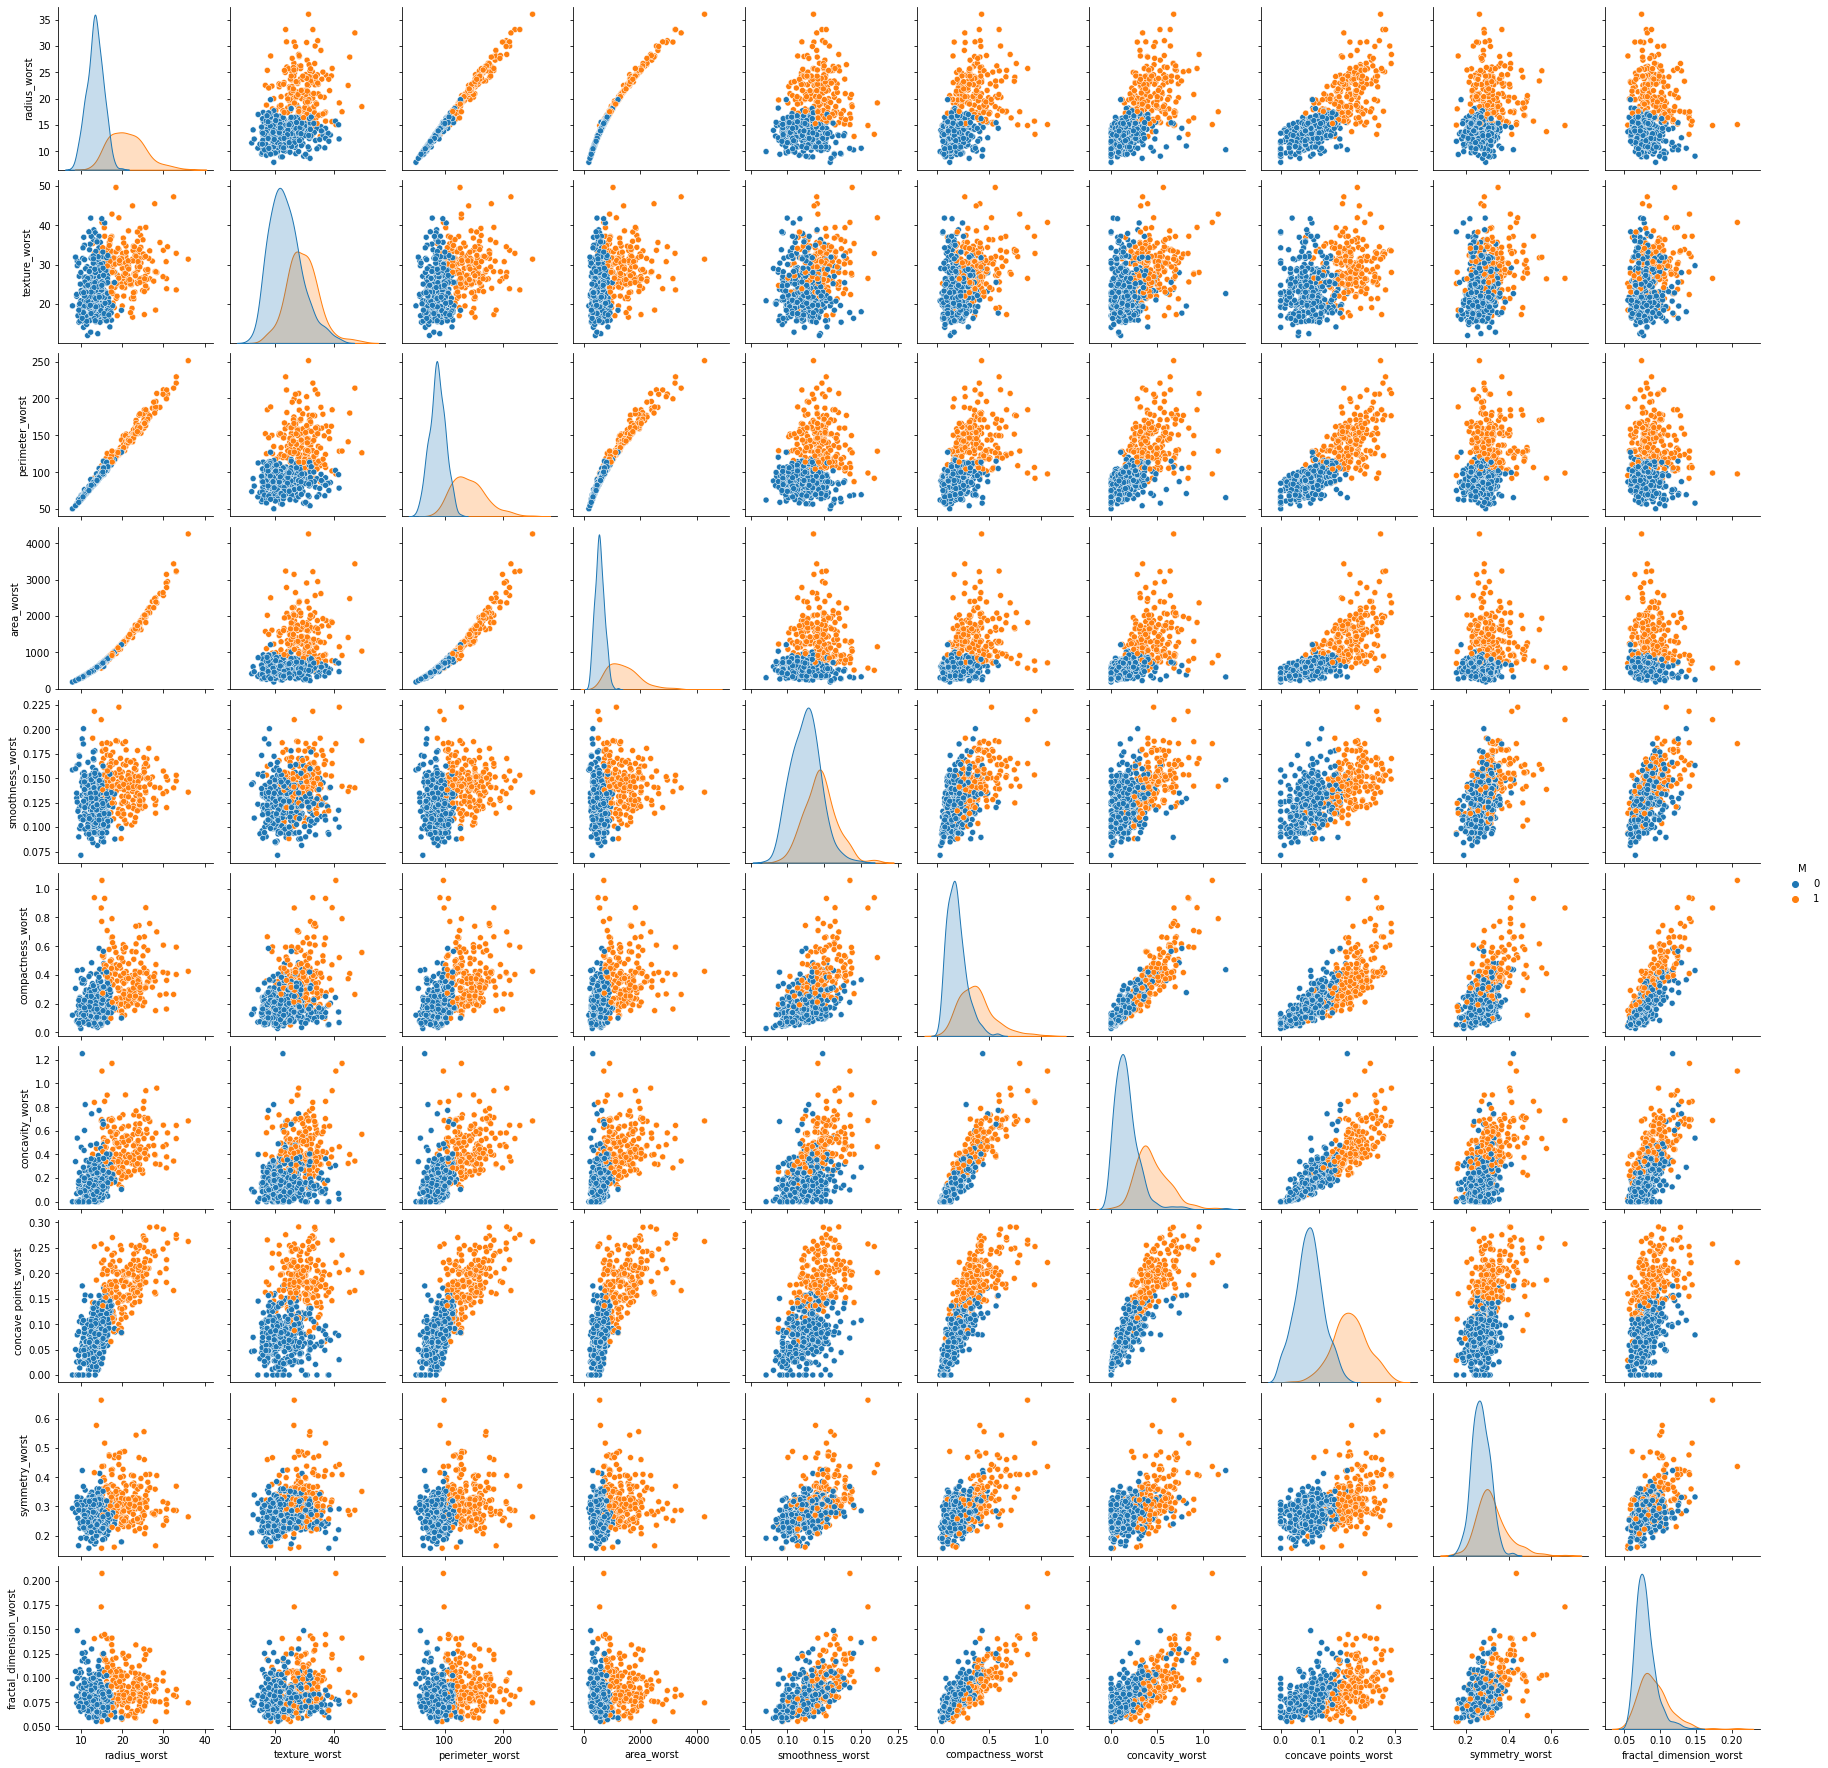

In [104]:
sns.pairplot(df_pt3, hue = 'M')

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
df_pt1_scaled = (df_pt1 - df_pt1.mean()) / (df_pt1.std())
df_pt2_scaled = (df_pt2 - df_pt2.mean()) / (df_pt2.std())
df_pt3_scaled = (df_pt3 - df_pt3.mean()) / (df_pt3.std())

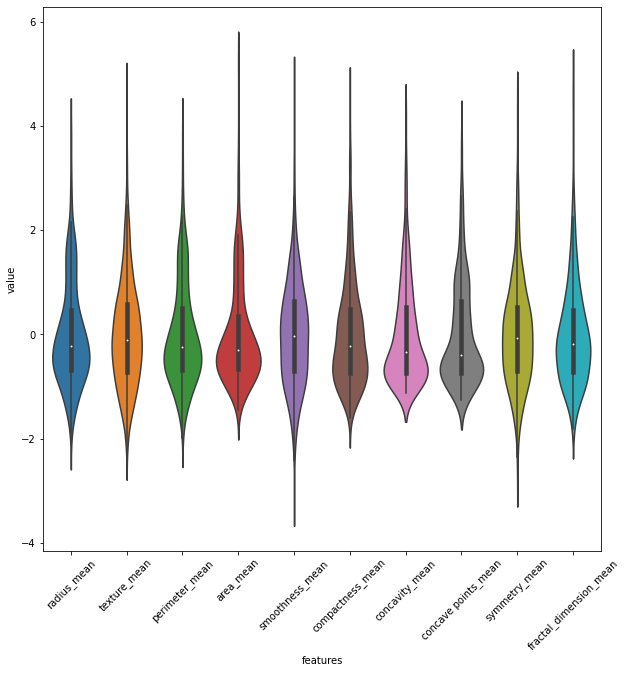

In [139]:
plt.figure(figsize=(10,10))
sns.violinplot(data=pd.melt(df_pt1_scaled,id_vars="M",var_name="features",value_name='value'),x='features',y='value')
plt.xticks(rotation=45);

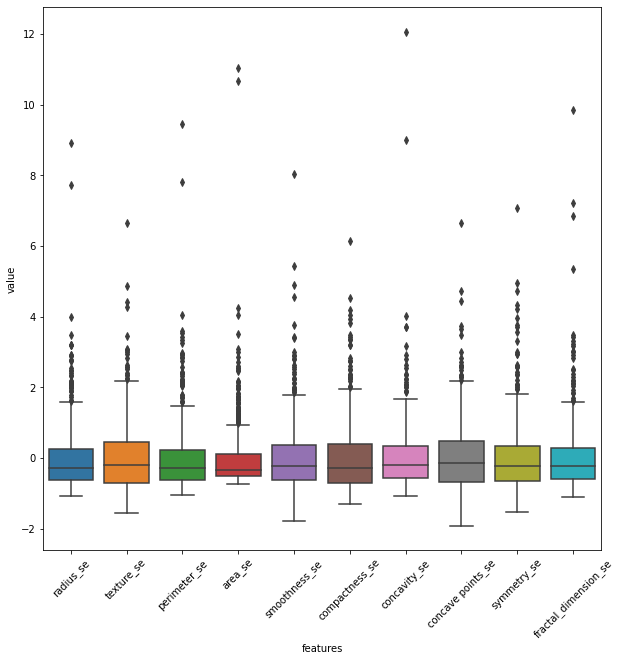

In [141]:
plt.figure(figsize=(10,10))
sns.boxplot(data=pd.melt(df_pt2_scaled,id_vars="M",var_name="features",value_name='value'),x='features',y='value')
plt.xticks(rotation=45);

<Figure size 720x720 with 0 Axes>

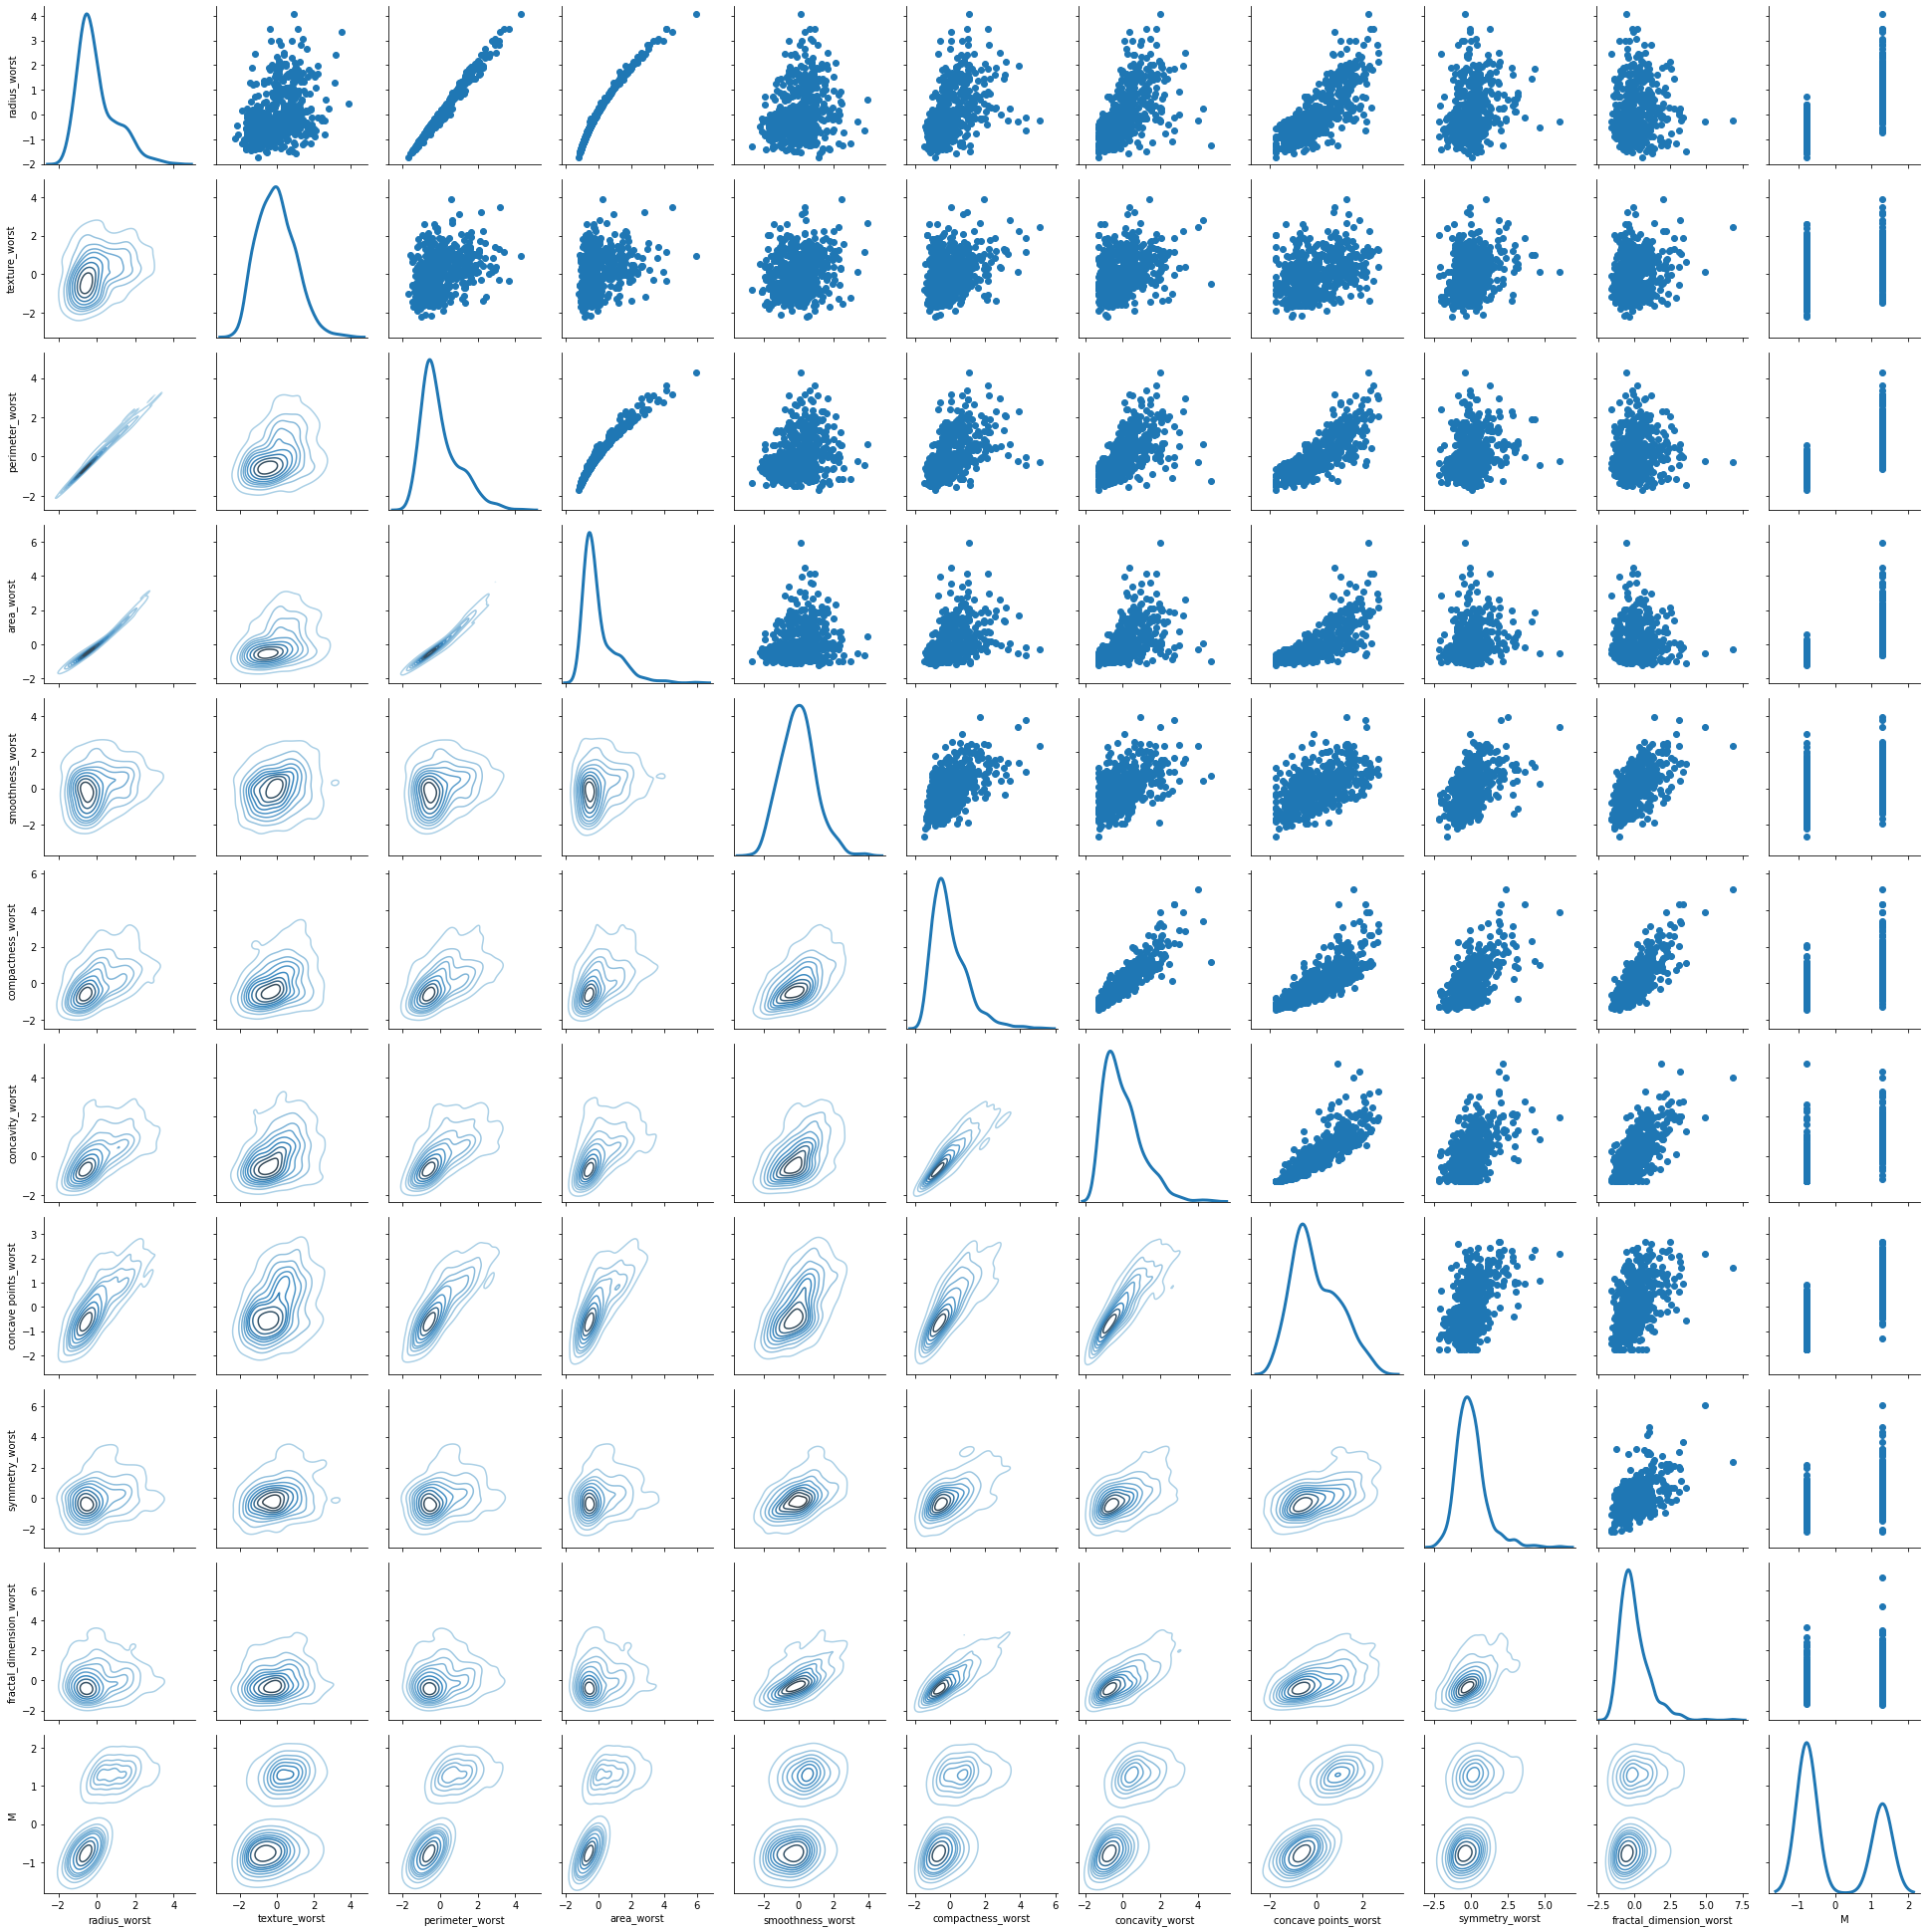

In [147]:
plt.figure(figsize=(10,10))
g = sns.PairGrid(df_pt3_scaled, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

<AxesSubplot:>

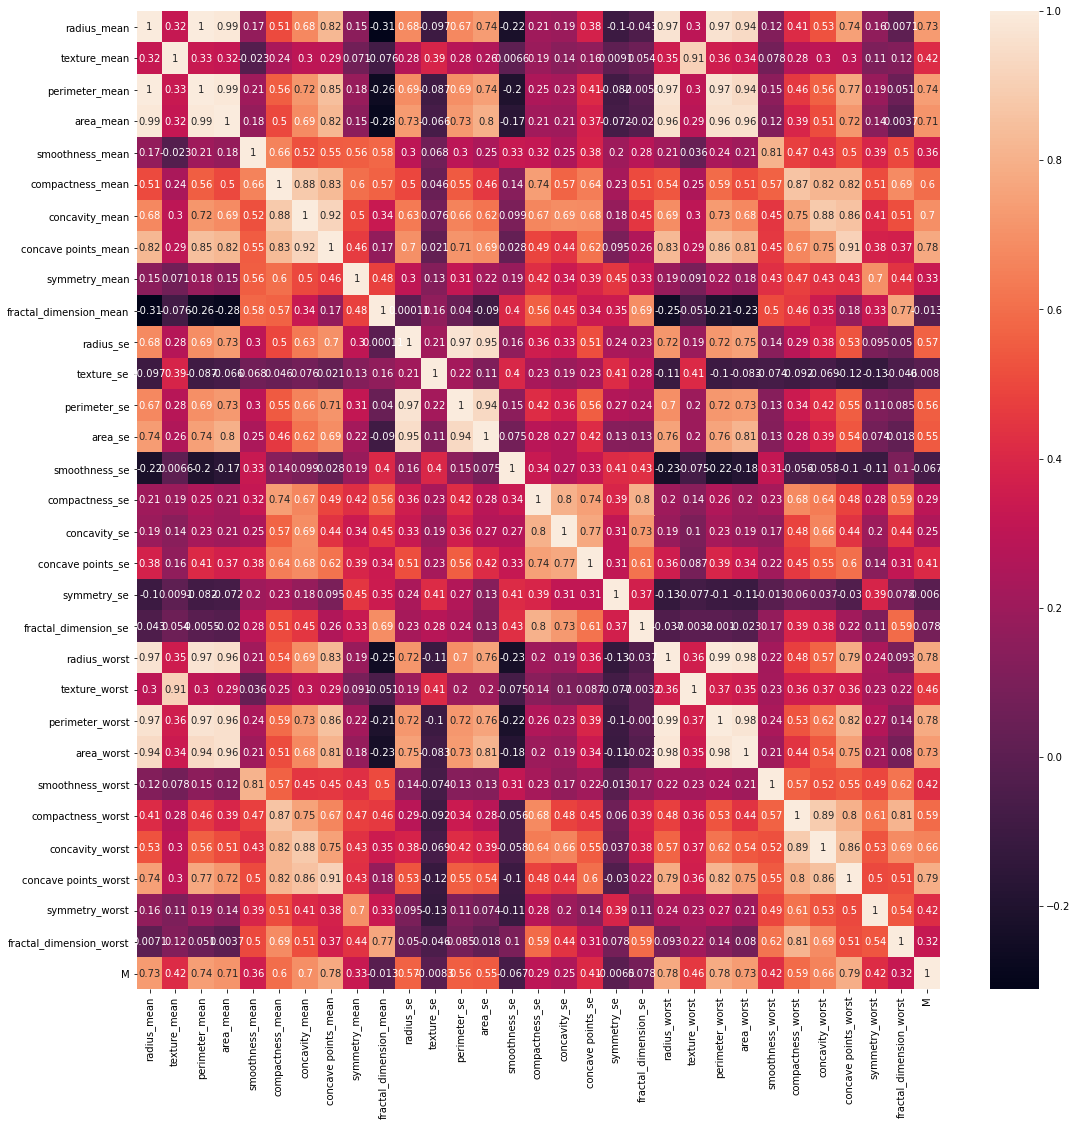

In [148]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)


In [149]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
              'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'compactness_se','concave points_se','texture_worst','area_worst']

In [150]:
df_dropped = df.drop(drop_list1,axis=1)

<AxesSubplot:>

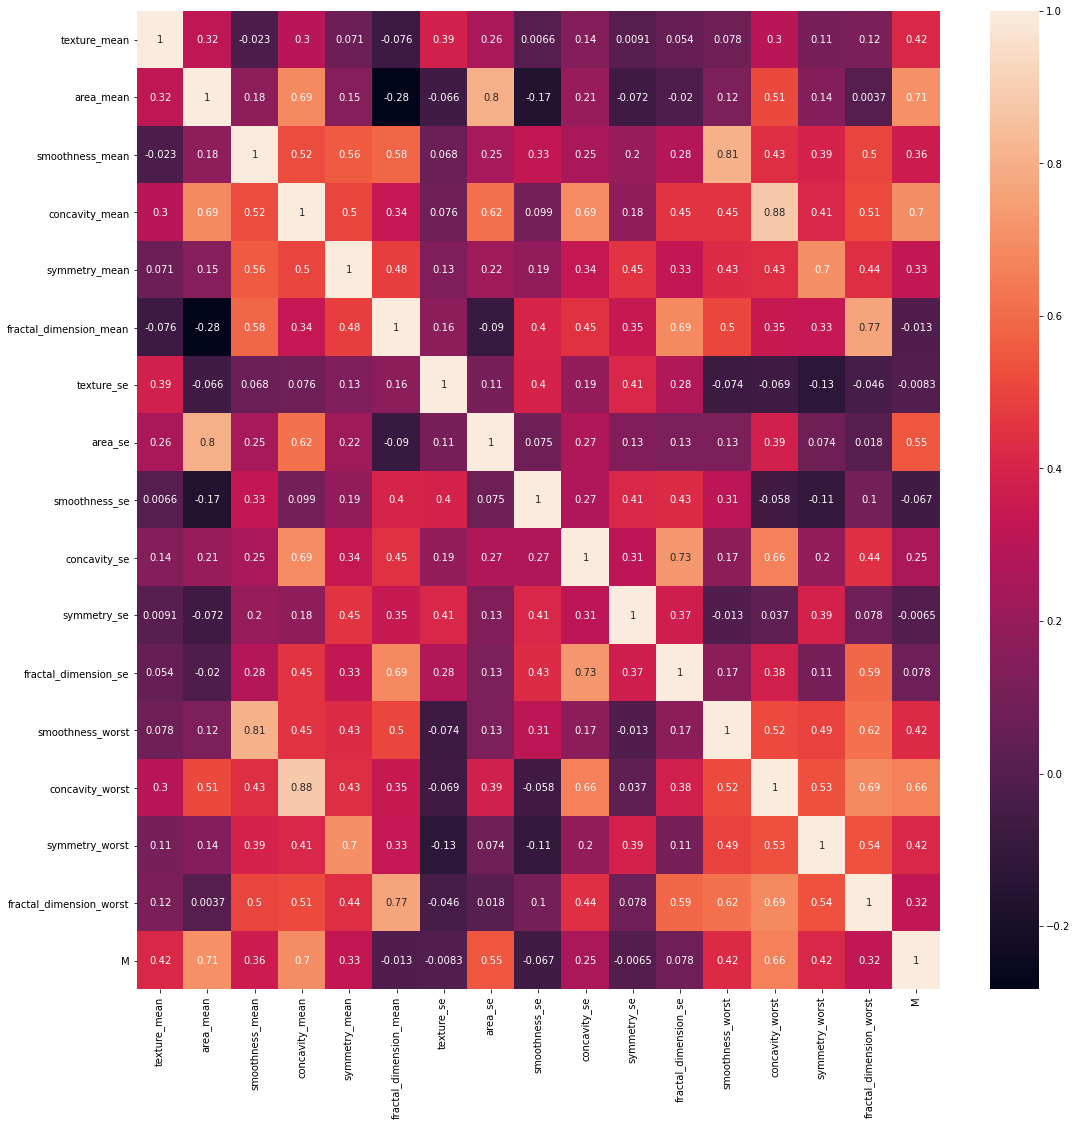

In [151]:
plt.figure(figsize=(18,18))
sns.heatmap(df_dropped.corr(), annot=True)


In [152]:
y = df_dropped['M']
x = df_dropped.drop('M',axis=1)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [159]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

smote = SMOTE(random_state=0)
x_train , y_train = smote.fit_resample(x_train,y_train)

x_train.shape,y_train.shape

((498, 16), (498,))

In [160]:
from scipy.stats.mstats import winsorize

for column_name in x_train.columns[:8]:

  x_train[column_name] = np.log1p(x_train[column_name])
  x_train[column_name] = winsorize(x_train[column_name], limits=[0.05, 0.05])

  x_test[column_name] = np.log1p(x_test[column_name])
  x_test[column_name] = winsorize(x_test[column_name], limits=[0.05, 0.05])

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [240]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log

97.08

In [241]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_svc

95.32

In [242]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn

95.32

In [243]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian

94.74

In [244]:

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_perceptron

88.89

In [245]:
linear_svc = LinearSVC(random_state=2)
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


95.32

In [246]:
sgd = SGDClassifier(random_state=2)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_sgd

93.57

In [247]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree

90.06

In [281]:
random_forest = RandomForestClassifier(random_state=63)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_random_forest

97.66

In [254]:
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
Y_pred = XGB_model.predict(x_test)
acc_XGB_model = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_XGB_model

96.49

In [262]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGB_model'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_XGB_model]})
models.sort_values(by='Score', ascending=False)

Model  Score
2         Logistic Regression  97.08
3               Random Forest  97.08
9                   XGB_model  96.49
0     Support Vector Machines  95.32
1                         KNN  95.32
7                  Linear SVC  95.32
4                 Naive Bayes  94.74
6  Stochastic Gradient Decent  93.57
8               Decision Tree  90.06
5                  Perceptron  88.89

In [278]:
test_scores = []
train_scores = []
from sklearn.model_selection import GridSearchCV


for i in range(1, 100):
    

    random_forest = RandomForestClassifier(random_state=i)
    random_forest.fit(x_train,y_train)
    Y_pred = random_forest.predict(x_test) 
    trainn = round(random_forest.score(x_train, y_train) * 100, 2)
    testt = round(accuracy_score(y_test,Y_pred)* 100, 2)
    train_scores.append(trainn)
    test_scores.append(testt)

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


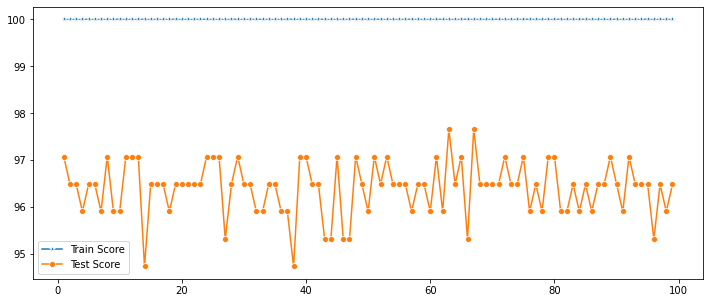

In [280]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

In [302]:
param_grid = {
            "n_estimators" : [10,30,50, 100],
            "max_depth" : [3,4,9,13,15]
    
}
random_forest = RandomForestClassifier(random_state=63)
gd_random_forest = GridSearchCV(random_forest,param_grid)
gd_random_forest.fit(x_train,y_train)
Y_pred = gd_random_forest.predict(x_test)
gd_random_forest.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [303]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 9, random_state=63)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_random_forest

97.66